<a href="https://colab.research.google.com/github/raul-macedo-freire/spe-rta-data-survey/blob/main/Full_SPE_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pontifícia Universidade Católica do Rio de Janeiro**
## This is a brief survey about one of the G&O (Gas & Oil) well's shared by SPE (SPE Data Repository: Data Set: 1, Well Number: all_wells. From URL: https://www.spe.org/datasets/dataset_1/csv_files/dataset_1_all_wells/production_data ) as part of RTA(rate transient anaysis).
This Work is focused on data analysis, database treatment and data viability for future works.

Students: Lorraine Oliveira; Raul Foronda

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
import prince
from copy import deepcopy
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(corr, correlation_name = 'pearson'):
  fig = plt.figure(figsize=(10,10))
  ax = sns.heatmap(corr,
                  vmin=-1,
                  vmax=1,
                  center=0,
                  square=True,
                  annot=True,
                  linewidths=0.8)
  ax.set_ylim(len(corr), 0)
  plt.title(f'matriz de correlação {correlation_name}')
  plt.show()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PUC/Mestrado/2024.1/SPE survey/all_spe_data.csv')

In [ ]:
data.columns
data

,Lease,Time (Days),Choke Size,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
0,OSPREY,1.0,NaN,0.145,504.39,718.0,NaN,2064.695943,14.695943,2064.695943,14.695943,Casing Pressure,5050.159793
1,OSPREY,2.0,NaN,0.186,564.76,922.0,NaN,1989.695943,14.695943,1989.695943,14.695943,Casing Pressure,5009.599839
2,OSPREY,3.0,NaN,0.231,653.51,753.0,NaN,1864.695943,14.695943,1864.695943,14.695943,Casing Pressure,4795.991972
3,OSPREY,4.0,NaN,0.268,740.71,700.0,NaN,1814.695943,14.695943,1814.695943,14.695943,Casing Pressure,4696.626023
4,OSPREY,5.0,NaN,0.261,678.06,530.0,NaN,1714.695943,14.695943,1714.695943,14.695943,Casing Pressure,4546.990059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60962,GOOSE,2842.0,NaN,0.000,0.00,0.0,NaN,1724.502000,-0.755000,-0.755000,1.723000,Tubing Pressure,NaN
60963,GOOSE,2843.0,NaN,0.000,0.00,0.0,NaN,1723.853000,-0.111000,-0.111000,2.343000,Tubing Pressure,NaN
60964,GOOSE,2844.0,NaN,0.000,0.00,0.0,NaN,1723.499000,-0.398000,-0.398000,1.099000,Tubing Pressure,NaN
60965,GOOSE,2845.0,NaN,0.000,0.00,0.0,NaN,1722.222000,-0.555000,-0.555000,0.633000,Tubing Pressure,NaN


In [ ]:
list(data.columns)

['Lease',
 'Time (Days)',
 'Choke Size',
 'Gas Volume (MMscf)',
 'Oil Volume (stb)',
 'Water Volume  (stb)',
 'Gas Lift Inj Volume  (MMscf)',
 'Casing Pressure  (psi(a))',
 'Tubing Pressure  (psi(a))',
 'Active Pressure  (psi(a))',
 'Line Pressure  (psi(a))',
 'Pressure Source ',
 'Calculated Sandface Pressure  (psi(a))']

## Describing data

In [ ]:
data.describe(include='all')

,Lease,Time (Days),Choke Size,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
count,60967,60967.000000,2288.000000,60748.000000,52537.000000,60958.000000,7651.000000,60967.000000,60967.000000,60967.000000,60967.000000,60967,60137.000000
unique,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,LORIKEET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tubing Pressure,NaN
freq,4031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40254,NaN
mean,NaN,852.282382,27.877185,5.982365,36.450496,77.349569,0.219279,1283.679384,759.501393,1390.495107,696.823718,NaN,2299.493810
std,NaN,824.906531,9.385130,7.607748,105.729334,149.923524,0.158324,1514.521635,899.819732,1465.415127,412.611400,NaN,1833.520500
min,NaN,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,-14.650000,-14.650000,-14.650000,0.000000,NaN,6.780602
25%,NaN,255.000000,22.000000,0.235618,0.000000,1.800000,0.000000,254.178000,0.000000,671.849500,405.369500,NaN,1161.582338
50%,NaN,574.000000,26.000000,3.878150,0.000000,9.625000,0.294000,891.922000,701.079000,972.141000,823.305000,NaN,1572.866109
75%,NaN,1178.000000,32.000000,8.115673,0.000000,78.000000,0.350000,1327.225500,1095.000000,1350.579000,1048.623500,NaN,2640.255039


<Axes: >

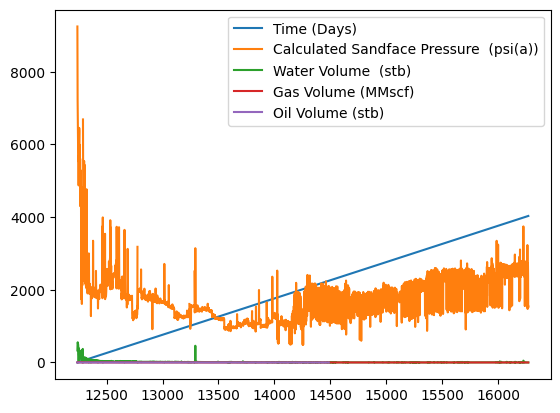

In [ ]:
data[['Time (Days)','Calculated Sandface Pressure  (psi(a))','Water Volume  (stb)','Gas Volume (MMscf)','Oil Volume (stb)']][data['Lease']=='LORIKEET'].plot()

# Percentual of Nan per Lease

Zero data

In [ ]:
null_percentual = pd.read_excel('/content/drive/MyDrive/PUC/Mestrado/2024.1/SPE survey/all_spe_data.xlsx',sheet_name = '% Dados ausentes por Lease')

In [ ]:
null_percentual

,Lease,Relative quantity on hole database,Choke Size,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
0,OSPREY,0.038513,1.0,0.000426,0.001704,0.000426,0.639693,0.0,0.0,0.0,0.0,0.0,0.027683
1,HAWK,0.015189,0.0,0.000000,0.000000,0.000000,0.772138,0.0,0.0,0.0,0.0,0.0,0.000000
2,EAGLE,0.024308,1.0,0.000000,0.000000,0.000000,0.223347,0.0,0.0,0.0,0.0,0.0,0.002699
3,KITE,0.017485,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,SWIFT,0.019191,1.0,0.000000,0.000000,0.000000,0.125641,0.0,0.0,0.0,0.0,0.0,0.010256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,0.188692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,0.442322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observed
- Casing Pressure is text column and can be ignored

- The columns 'Choke Size' and 'Gas Lift Inj Volume  (MMscf)' have over 80% of empty vectors, however, such a profile does not appears to have led Calculated Sandface Pressure (psi(a)) to as many mispredictions.
## **Assumption 1:** Removing the columns Choke Size and Gas Lift Inj Volume would no lead to bad results on future machine learning methods.
## **Assumption 2:** null data that represents less than 5% of the hole dataset can be ignored
# Checking data with null values profile

Considering only null vectors, the leases LOON, CUCKOO and ROOSTER presents over 50% of null vectores in the Oil Volume Column.

Once again, considering only null vectors, the leases:LORIKEET, MYNAH, PARTRIDGE, CASSOWARY, ORIOLE, WARBLER, HARPY, BEE-EATER, ARCHAEOPTERYX, TERN, STILT, AVOCET, all presents a percentage of null vectors in the column Oil Volume, between 10 and 50% (11% up to 44.2%)

# Hypothesis 1:
- The column Oil Volume is not as much important to predict Calculated Sandface Pressure as the other columns and it can be removed.
- The Amount of null data in the other columns can be ignored since they represent small amount of data (less than 2%)
- Zero values can be considered in the analysis
- the null vectores for FALCON lease 'Gas Volume (MMscf)' column can be droped since it represents small percentage of data

## Dropping column Oil Volume

In [ ]:
from copy import deepcopy
data_hypo1 = deepcopy(data.drop(columns=['Oil Volume (stb)','Choke Size','Gas Lift Inj Volume  (MMscf)','Pressure Source '],axis=1))
data_hypo1.dropna(inplace=True)
data_hypo1

,Lease,Time (Days),Gas Volume (MMscf),Water Volume (stb),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Calculated Sandface Pressure (psi(a))
0,OSPREY,1.0,0.145,718.0,2064.695943,14.695943,2064.695943,14.695943,5050.159793
1,OSPREY,2.0,0.186,922.0,1989.695943,14.695943,1989.695943,14.695943,5009.599839
2,OSPREY,3.0,0.231,753.0,1864.695943,14.695943,1864.695943,14.695943,4795.991972
3,OSPREY,4.0,0.268,700.0,1814.695943,14.695943,1814.695943,14.695943,4696.626023
4,OSPREY,5.0,0.261,530.0,1714.695943,14.695943,1714.695943,14.695943,4546.990059
...,...,...,...,...,...,...,...,...,...
60951,GOOSE,2831.0,0.000,0.0,1473.662000,184.091000,184.091000,0.487000,213.370013
60952,GOOSE,2832.0,0.000,0.0,1473.415000,189.275000,189.275000,0.487000,219.402145
60953,GOOSE,2833.0,0.000,0.0,1473.073000,194.299000,194.299000,0.749000,225.249354
60954,GOOSE,2834.0,0.000,0.0,1472.424000,199.256000,199.256000,1.941000,231.019803


In [ ]:
data_hypo1.columns

Index(['Lease', 'Time (Days)', 'Gas Volume (MMscf)', 'Water Volume  (stb)',
       'Casing Pressure  (psi(a))', 'Tubing Pressure  (psi(a))',
       'Active Pressure  (psi(a))', 'Line Pressure  (psi(a))',
       'Calculated Sandface Pressure  (psi(a))'],
      dtype='object')

In [ ]:
hypo1_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
columns_without_text_and_days_hypo_1 = ['Gas Volume (MMscf)', 'Water Volume  (stb)',
       'Casing Pressure  (psi(a))', 'Tubing Pressure  (psi(a))',
       'Active Pressure  (psi(a))', 'Line Pressure  (psi(a))',
       'Calculated Sandface Pressure  (psi(a))']
data_without_days = data_hypo1[columns_without_text_and_days_hypo_1]
norm_data_hypo1 = hypo1_scaler.fit_transform(data_without_days)
norm_data_hypo1 = pd.DataFrame(norm_data_hypo1, columns=columns_without_text_and_days_hypo_1)

In [ ]:
norm_data_hypo1

,Gas Volume (MMscf),Water Volume (stb),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Calculated Sandface Pressure (psi(a))
0,0.002356,0.313948,0.202010,0.003447,0.236878,0.011216,0.454893
1,0.003022,0.403148,0.194689,0.003447,0.228252,0.011216,0.451235
2,0.003753,0.329252,0.182486,0.003447,0.213877,0.011216,0.431968
3,0.004354,0.306078,0.177605,0.003447,0.208126,0.011216,0.423006
4,0.004241,0.231745,0.167843,0.003447,0.196626,0.011216,0.409509
...,...,...,...,...,...,...,...
59912,0.000000,0.000000,0.144314,0.023343,0.020597,0.000372,0.018634
59913,0.000000,0.000000,0.144290,0.023952,0.021193,0.000372,0.019178
59914,0.000000,0.000000,0.144256,0.024542,0.021771,0.000572,0.019705
59915,0.000000,0.000000,0.144193,0.025124,0.022341,0.001481,0.020225


## Correlation matrix for Hypothesis 1

In [ ]:
spearman_corr_hypo_1 = norm_data_hypo1.corr(method='spearman')


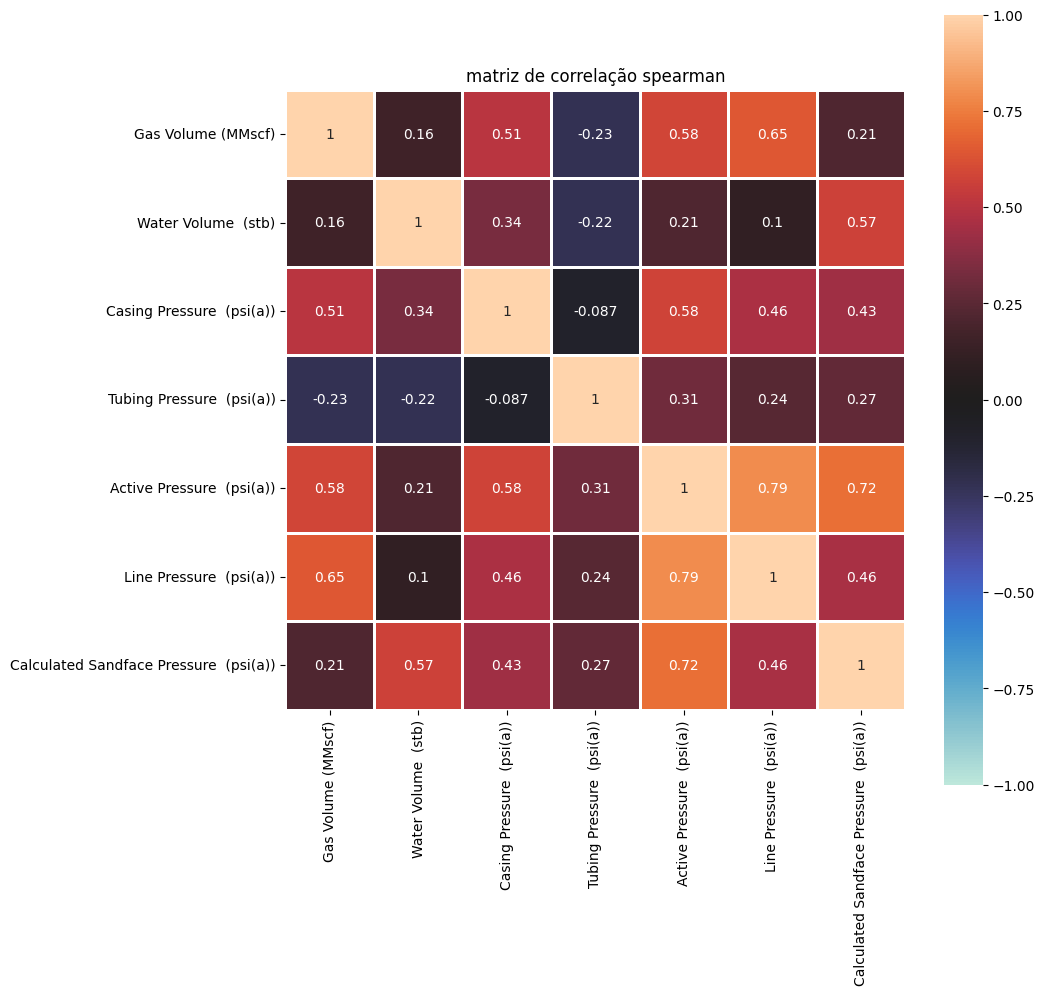

In [ ]:
plot_correlation_matrix(spearman_corr_hypo_1,'spearman')

## **PCA hypothesis 1:**


In [ ]:
X_hypo_1 = norm_data_hypo1[norm_data_hypo1.columns[:-1]]
Y_hypo_1 = norm_data_hypo1[norm_data_hypo1.columns[-1]]


In [ ]:
pca_hypp_1 = prince.PCA( n_components=6,
                  n_iter=10,
                  rescale_with_mean=True,
                  rescale_with_std=True,
                  copy=True,
                  check_input=True,
                  engine='sklearn',
                  random_state=200 )

In [ ]:
pca_hypp_1_fit = pca_hypp_1.fit(X_hypo_1)

In [ ]:
pca_hypp_1_fit.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.244,54.06%,54.06%
1,1.238,20.64%,74.70%
2,0.824,13.74%,88.44%
3,0.338,5.63%,94.07%
4,0.280,4.67%,98.75%
5,0.075,1.25%,100.00%


In [ ]:
pca_hypp_1_fit.column_contributions_.style.format('{:.0%}')

component,0,1,2,3,4,5
variable,,,,,,
Gas Volume (MMscf),18%,5%,26%,20%,31%,1%
Water Volume (stb),14%,12%,31%,23%,20%,0%
Casing Pressure (psi(a)),26%,1%,2%,4%,30%,36%
Tubing Pressure (psi(a)),1%,65%,13%,7%,12%,3%
Active Pressure (psi(a)),28%,1%,2%,4%,7%,59%
Line Pressure (psi(a)),13%,17%,26%,43%,0%,0%


In [ ]:
pca_hypp_1_fit.column_correlations

component,0,1,2,3,4,5
variable,,,,,,
Gas Volume (MMscf),0.757275,-0.248722,-0.458579,-0.257432,0.295454,0.028511
Water Volume (stb),0.683458,-0.379667,0.506179,0.275827,0.237043,0.015849
Casing Pressure (psi(a)),0.919721,-0.089193,0.141094,-0.118177,-0.291274,0.165664
Tubing Pressure (psi(a)),0.169618,0.898379,0.326497,-0.150936,0.181250,0.043720
Active Pressure (psi(a)),0.949410,0.081866,0.125968,-0.114652,-0.135106,-0.211310
Line Pressure (psi(a)),0.653585,0.458647,-0.464245,0.381854,-0.031107,0.012878


# Hypothesis 2:
- Oil Volume is important to predict Calculated Sandface Pressure, thus only data for leases with less than 10% missing vectors on Oil Volume should be considered
- the null vectores for FALCON lease 'Gas Volume (MMscf)' column can be droped

In [ ]:
data_hypo2 = deepcopy(data.drop(columns=['Choke Size','Gas Lift Inj Volume  (MMscf)','Pressure Source '],axis=1))
leases_to_drop = [
    'FALCON',
    'LORIKEET',
    'MYNAH',
    'PARTRIDGE',
    'CASSOWARY',
    'ORIOLE',
    'WARBLER',
    'HARPY',
    'BEE-EATER',
    'LOON',
    'CUCKOO',
    'ROOSTER',
    'ARCHAEOPTERYX',
    'TERN',
    'STILT',
    'AVOCET',
    'CRANE',
    'IBIS',
]
data_hypo2 = data_hypo2[~data_hypo2['Lease'].isin(leases_to_drop)]
data_hypo2.dropna(inplace=True)

In [ ]:
hypo2_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
columns_without_text_and_days_hypo_2 = ['Oil Volume (stb)','Gas Volume (MMscf)', 'Water Volume  (stb)',
       'Casing Pressure  (psi(a))', 'Tubing Pressure  (psi(a))',
       'Active Pressure  (psi(a))', 'Line Pressure  (psi(a))',
       'Calculated Sandface Pressure  (psi(a))']
data_without_days_hypo2 = data_hypo2[columns_without_text_and_days_hypo_2]
norm_data_hypo2 = hypo2_scaler.fit_transform(data_without_days_hypo2)
norm_data_hypo2 = pd.DataFrame(norm_data_hypo2, columns=columns_without_text_and_days_hypo_2)

In [ ]:
spearman_corr_hypo_2 = norm_data_hypo2.corr(method='spearman')

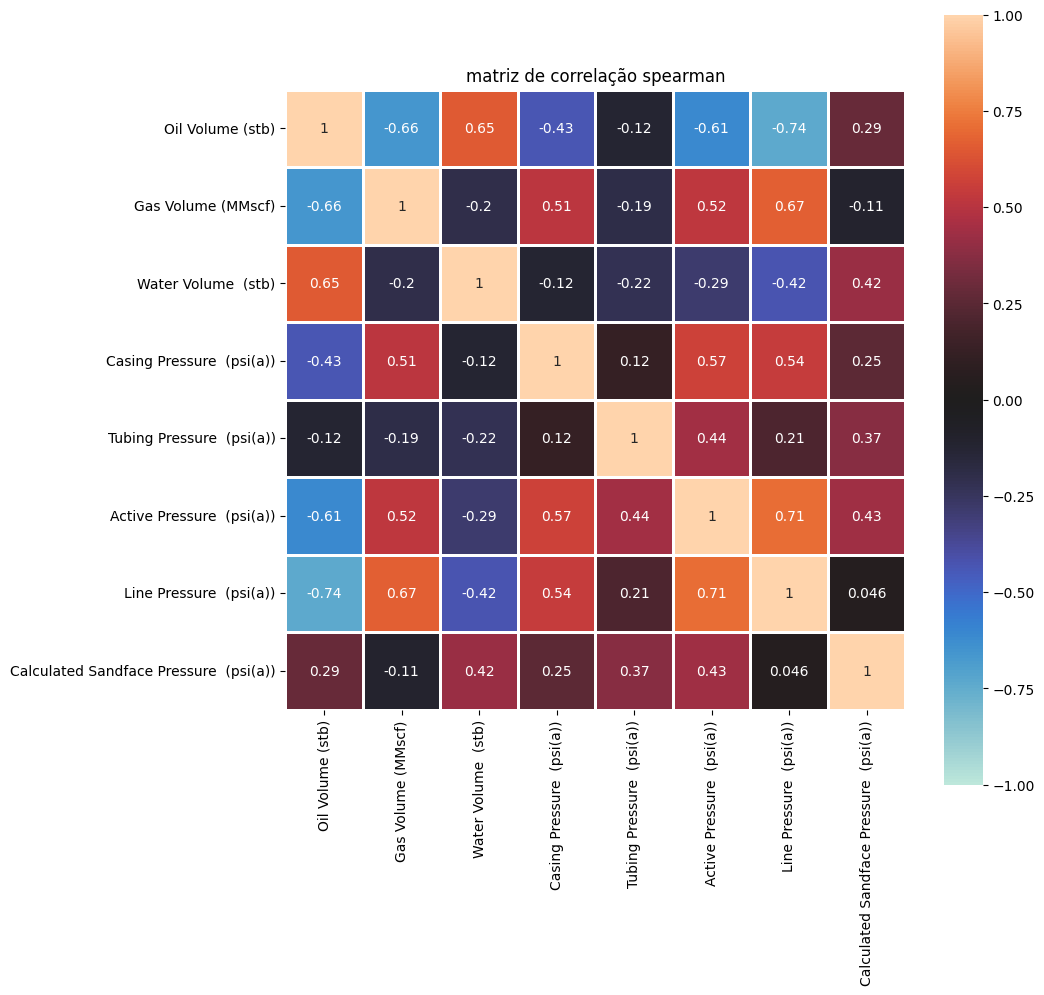

In [ ]:
plot_correlation_matrix(spearman_corr_hypo_2,'spearman')

## **PCA hypothesis 2:**


In [ ]:
X_hypo_2 = norm_data_hypo2[norm_data_hypo2.columns[:-1]]
Y_hypo_2 = norm_data_hypo2[norm_data_hypo2.columns[-1]]
pca_hypp_2 = prince.PCA( n_components=6,
                  n_iter=10,
                  rescale_with_mean=True,
                  rescale_with_std=True,
                  copy=True,
                  check_input=True,
                  engine='sklearn',
                  random_state=200 )
pca_hypp_2_fit = pca_hypp_2.fit(X_hypo_2)

In [ ]:
pca_hypp_2_fit.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.138,44.83%,44.83%
1,1.532,21.88%,66.71%
2,1.103,15.75%,82.46%
3,0.468,6.69%,89.15%
4,0.353,5.04%,94.19%
5,0.304,4.35%,98.53%


In [ ]:
pca_hypp_2_fit.column_contributions_.style.format('{:.0%}')

component,0,1,2,3,4,5
variable,,,,,,
Oil Volume (stb),11%,23%,6%,12%,47%,0%
Gas Volume (MMscf),11%,4%,46%,1%,2%,23%
Water Volume (stb),4%,35%,15%,25%,14%,7%
Casing Pressure (psi(a)),18%,5%,4%,49%,13%,9%
Tubing Pressure (psi(a)),9%,22%,29%,1%,1%,7%
Active Pressure (psi(a)),24%,10%,0%,2%,0%,11%
Line Pressure (psi(a)),23%,1%,0%,9%,23%,43%


In [ ]:
pca_hypp_2_fit.column_correlations

component,0,1,2,3,4,5
variable,,,,,,
Oil Volume (stb),0.600383,0.587386,0.267646,-0.239074,-0.406385,-0.012661
Gas Volume (MMscf),-0.581809,-0.242376,0.712602,0.078331,-0.072886,-0.263568
Water Volume (stb),0.344323,0.729544,0.400035,0.343715,0.221457,0.145230
Casing Pressure (psi(a)),-0.753586,0.288402,0.207137,-0.481113,0.216131,0.163452
Tubing Pressure (psi(a)),-0.533224,0.578844,-0.564253,0.066352,-0.069719,-0.145933
Active Pressure (psi(a)),-0.863701,0.395653,-0.008470,0.096978,-0.009567,-0.183375
Line Pressure (psi(a)),-0.849899,-0.144538,0.042271,0.203152,-0.285637,0.363305


#**Regression**

In [ ]:
import pickle
folder_path = '/content/drive/MyDrive/PUC/Mestrado/2024.1/SPE survey/'

def load_model(filename):
    with open(folder_path+filename, 'rb') as file:
        model = pickle.load(file)
    return model

def save_model(model, filename):
    with open(folder_path+filename, 'wb') as file:
        pickle.dump(model, file)

##  **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_hypo_1, Y_hypo_1, random_state=0,test_size=0.3)


In [ ]:
regressor1 = DecisionTreeRegressor(random_state=0)

params = {
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8]
}
grid1 = GridSearchCV(estimator=regressor1,param_grid=params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
grid1.fit(X_train1, y_train1)
best_model1 = grid1.best_estimator_
best_model1

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=10,
                      random_state=0)

In [ ]:
y_pred_1 = best_model1.predict(X_test1)
r2_decision_tree_1 = r2_score(y_test1, y_pred_1)
mse_decision_tree_1 = mean_squared_error(y_test1, y_pred_1)
print(f'MSE (Decision Tree): {mse_decision_tree_1}')
print(f'R² (Decision Tree): {r2_decision_tree_1}')

MSE (Decision Tree): 0.00048781499622890844
R² (Decision Tree): 0.9818978924299456


In [ ]:
# save_model(best_model1, 'decision_tree_hipo_1.pkl')

In [ ]:
decision_tree_hipo_1 = load_model('decision_tree_hipo_1.pkl')

In [ ]:
decision_tree_hipo_1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

<ipython-input-71-2b3d453da827>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1, np.ravel(y_pred_1), 'k--',color='blue', label = 'Predito')


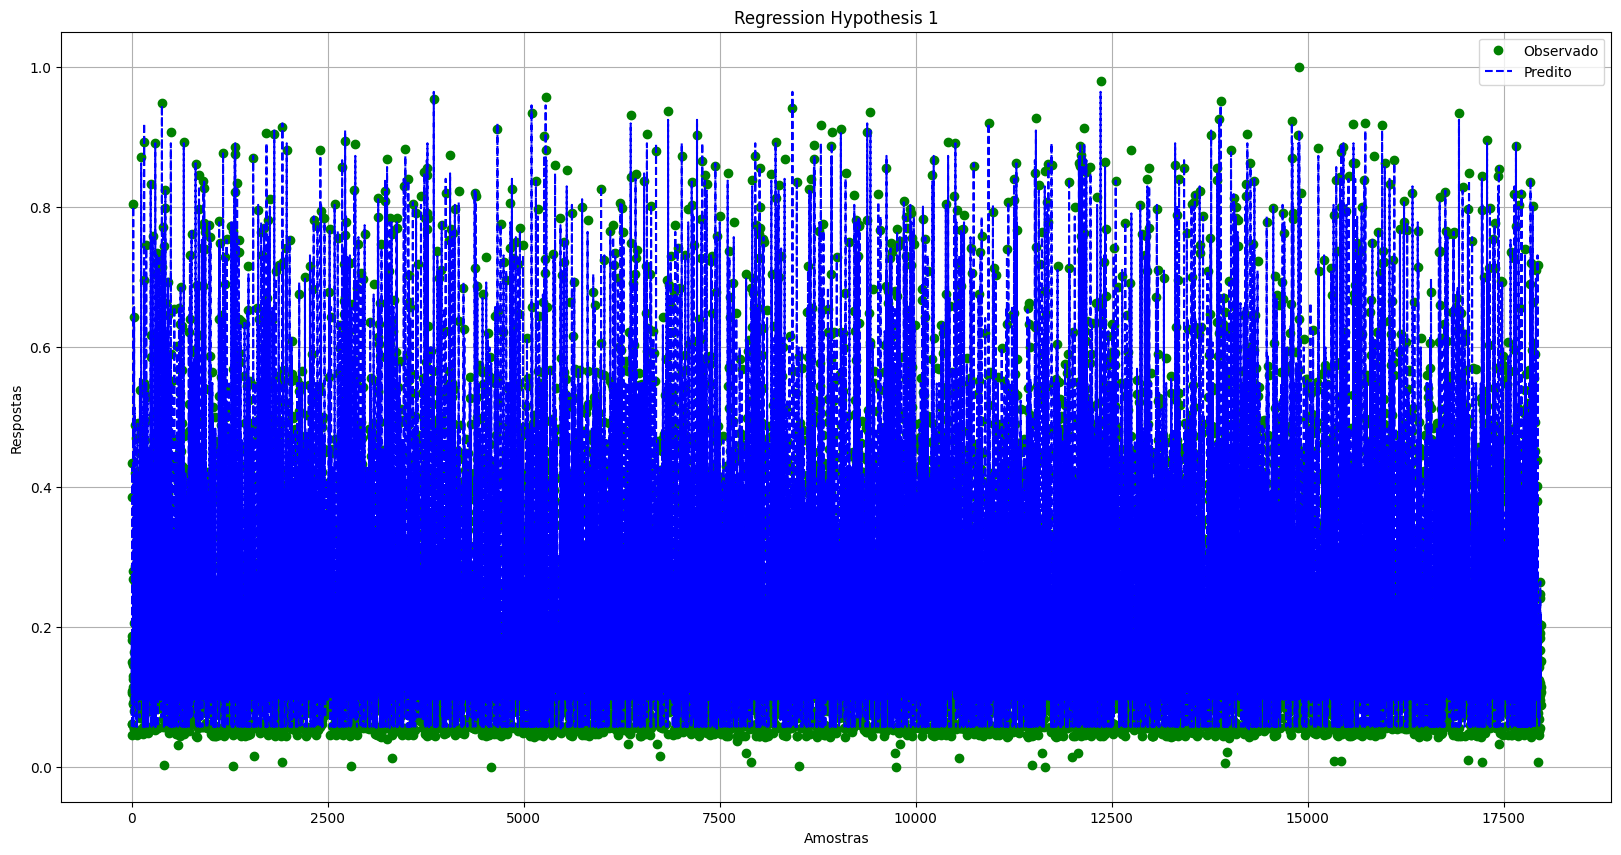

In [ ]:
x1 = np.array(range(len(y_test1)))
fig1 = plt.figure(figsize=(20,10))

plt.plot(x1, np.ravel(y_test1), 'go', label = 'Observado')
plt.plot(x1, np.ravel(y_pred_1), 'k--',color='blue', label = 'Predito')

plt.legend()

plt.title('Regression Hypothesis 1')

plt.grid(True)
plt.xlabel("Amostras")
plt.ylabel("Respostas")

plt.show()

In [ ]:
from sklearn.svm import SVR

# Definir os parâmetros para o GridSearch
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5]
}

# Instanciar o modelo
svr_model = SVR()

# Otimização de hiperparâmetros com GridSearchCV
grid_search_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train1, y_train1)

# Melhor modelo encontrado pelo GridSearch
best_svr = grid_search_svr.best_estimator_

# Fazer previsões
y_pred_svr = best_svr.predict(X_test1)

# Avaliar o desempenho do modelo
mse_svr = mean_squared_error(y_test1, y_pred_svr)
r2_svr = r2_score(y_test1, y_pred_svr)


In [ ]:
print("MSE SVR:", mse_svr)
print("R2 SVR:", r2_svr)

MSE SVR: 0.002164557922407864
R2 SVR: 0.9196763923701646


In [ ]:
# save_model(best_svr, 'svr_hipo_1.pkl')

In [ ]:
svr_hipo_1 = load_model('svr_hipo_1.pkl')
svr_hipo_1.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para o GridSearch
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Instanciar o modelo
gbr_model = GradientBoostingRegressor(random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search_gbr = GridSearchCV(gbr_model, param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr.fit(X_train1, y_train1)

# Melhor modelo encontrado pelo GridSearch
best_gbr = grid_search_gbr.best_estimator_

# Fazer previsões
y_pred_gbr = best_gbr.predict(X_test1)

# Avaliar o desempenho do modelo
mse_gbr = mean_squared_error(y_test1, y_pred_gbr)
r2_gbr = r2_score(y_test1, y_pred_gbr)

print(f'MSE (Gradient Boosting): {mse_gbr}')
print(f'R² (Gradient Boosting): {r2_gbr}')

MSE (Gradient Boosting): 0.00011801906587146687
R² (Gradient Boosting): 0.9956204834983792


In [ ]:
# save_model(best_gbr, 'gbr_hipo_1.pkl')

In [ ]:
gbr_hipo_1 = load_model('gbr_hipo_1.pkl')
gbr_hipo_1.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

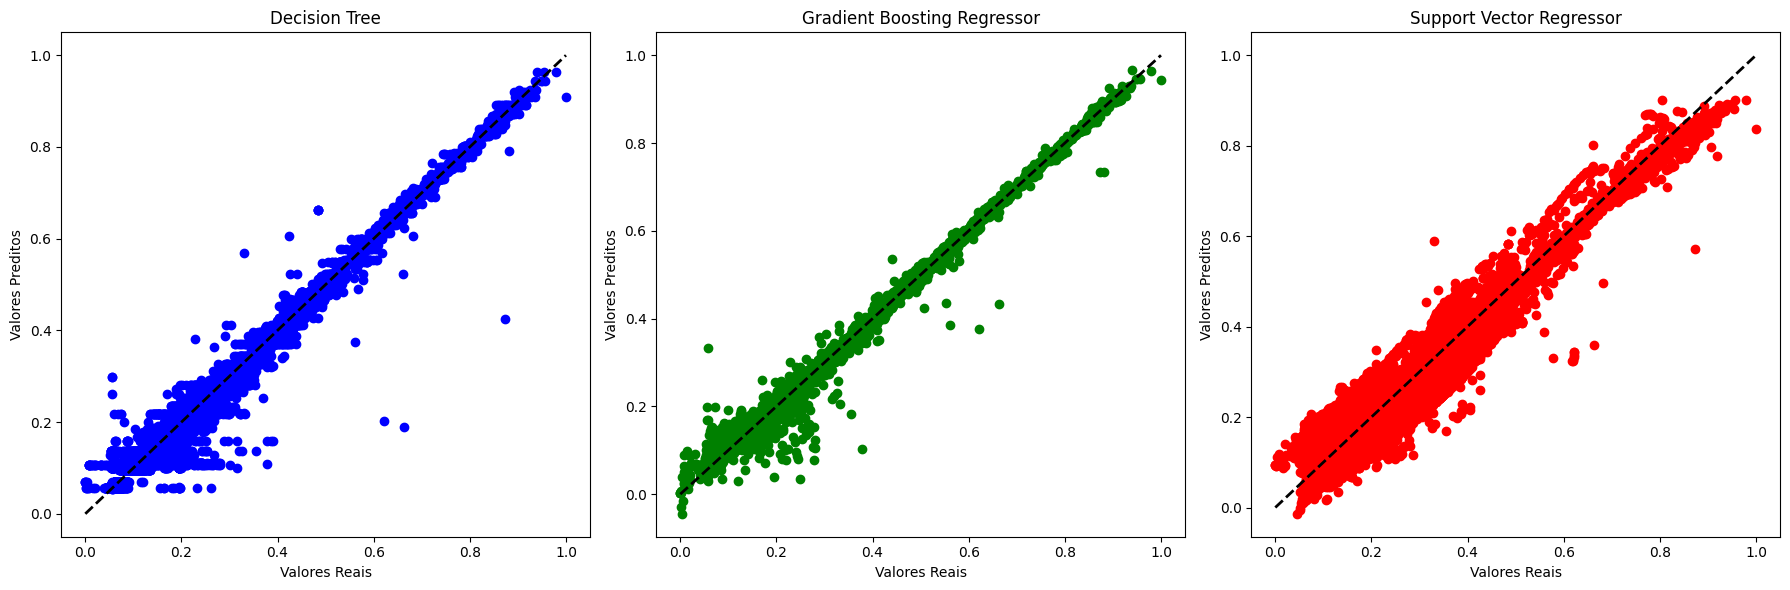

In [ ]:
import matplotlib.pyplot as plt

# Plotar as previsões e os valores reais
plt.figure(figsize=(18, 6))

# Previsões do Decision Tree
plt.subplot(1, 3, 1)
plt.scatter(y_test1, y_pred_1, color='blue')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
plt.title('Decision Tree')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

# Previsões do Support Vector Regressor
plt.subplot(1, 3, 3)
plt.scatter(y_test1, y_pred_svr, color='red')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
plt.title('Support Vector Regressor')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

# Previsões do Gradient Boosting Regressor
plt.subplot(1, 3, 2)
plt.scatter(y_test1, y_pred_gbr, color='green')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
plt.title('Gradient Boosting Regressor')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')


plt.tight_layout()
plt.show()


## **Regression - Hypothesis 2**

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_hypo_2, Y_hypo_2, random_state=0,test_size=0.3)


In [ ]:
regressor2 = DecisionTreeRegressor(random_state=0)

params = {
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8]
}
grid = GridSearchCV(estimator=regressor2,param_grid=params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8], 'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model_decision_tree_2 = grid.best_estimator_
best_model_decision_tree_2

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=0)

In [ ]:
from sklearn.metrics import r2_score
y_pred_2 = best_model_decision_tree_2.predict(X_test2)
r2_decision_tree_2 = r2_score(y_test2, y_pred_2)
mean_error_decision_tree_2 = mean_squared_error(y_test2, y_pred_2)
print(f'MSE (Decision Tree): {mean_error_decision_tree_2}')
print(f'R² (Decision Tree): {r2_decision_tree_2}')

MSE (Decision Tree): 0.0014374718123050774
R² (Decision Tree): 0.9411655088619777


In [ ]:
# save_model(best_model_decision_tree_2, 'decision_tree_hipo_2.pkl')

In [ ]:
best_model_decision_tree_2 = load_model('decision_tree_hipo_2.pkl')
best_model_decision_tree_2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
# Definir os parâmetros para o GridSearch
param_grid_svr2 = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5]
}

# Instanciar o modelo
svr_model2 = SVR()

# Otimização de hiperparâmetros com GridSearchCV
grid_search_svr2 = GridSearchCV(svr_model2, param_grid_svr2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr2.fit(X_train2, y_train2)

# Melhor modelo encontrado pelo GridSearch
best_svr2 = grid_search_svr2.best_estimator_

# Fazer previsões
y_pred_svr2 = best_svr2.predict(X_test2)

# Avaliar o desempenho do modelo
mse_svr2 = mean_squared_error(y_test2, y_pred_svr2)
r2_svr2 = r2_score(y_test2, y_pred_svr2)
print(f'MSE (SVR): {mse_svr2}')
print(f'R² (SVR): {r2_svr2}')

MSE (SVR): 0.002959830502215717
R² (SVR): 0.8788566704668705


In [ ]:
# save_model(best_svr2, 'svr_hipo_2.pkl')

In [ ]:
best_svr2 = load_model('svr_hipo_2.pkl')
best_svr2.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para o GridSearch
param_grid_gbr2 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Instanciar o modelo
gbr_model_2 = GradientBoostingRegressor(random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search_gbr2 = GridSearchCV(gbr_model_2, param_grid_gbr2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr2.fit(X_train2, y_train2)

# Melhor modelo encontrado pelo GridSearch
best_gbr2 = grid_search_gbr2.best_estimator_

# Fazer previsões
y_pred_gbr2 = best_gbr2.predict(X_test2)

# Avaliar o desempenho do modelo
mse_gbr2 = mean_squared_error(y_test2, y_pred_gbr2)
r2_gbr2 = r2_score(y_test2, y_pred_gbr)

print(f'MSE (Gradient Boosting): {mse_gbr2}')
print(f'R² (Gradient Boosting): {r2_gbr2}')

NameError: name 'mean_squared_error' is not defined

In [ ]:
# save_model(best_gbr2, 'best_gbr2.pkl')

In [ ]:
best_gbr2 = load_model('best_gbr2.pkl')
best_gbr2.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
mse_gbr2 = mean_squared_error(y_test2, y_pred_gbr2)
r2_gbr2 = r2_score(y_test2, y_pred_gbr2)

print(f'MSE (Gradient Boosting): {mse_gbr2}')
print(f'R² (Gradient Boosting): {r2_gbr2}')

MSE (Gradient Boosting): 0.0003574399612887187
R² (Gradient Boosting): 0.9838938561034664


Text(0, 0.5, 'Valores Preditos')

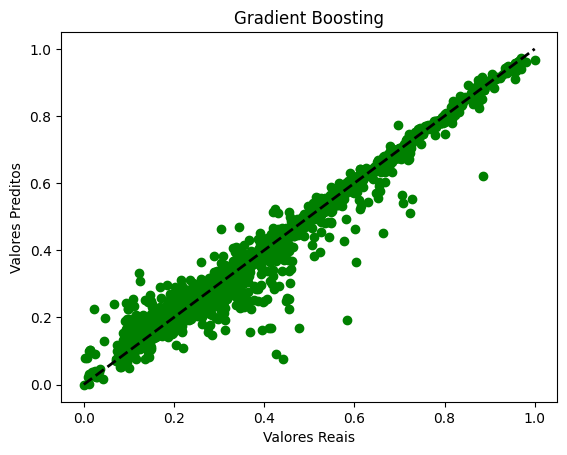

In [ ]:
import matplotlib.pyplot as plt

# plt.subplot(1, 3, 1)
plt.scatter(y_test2, y_pred_gbr2, color='green')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=2)
plt.title('Gradient Boosting')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

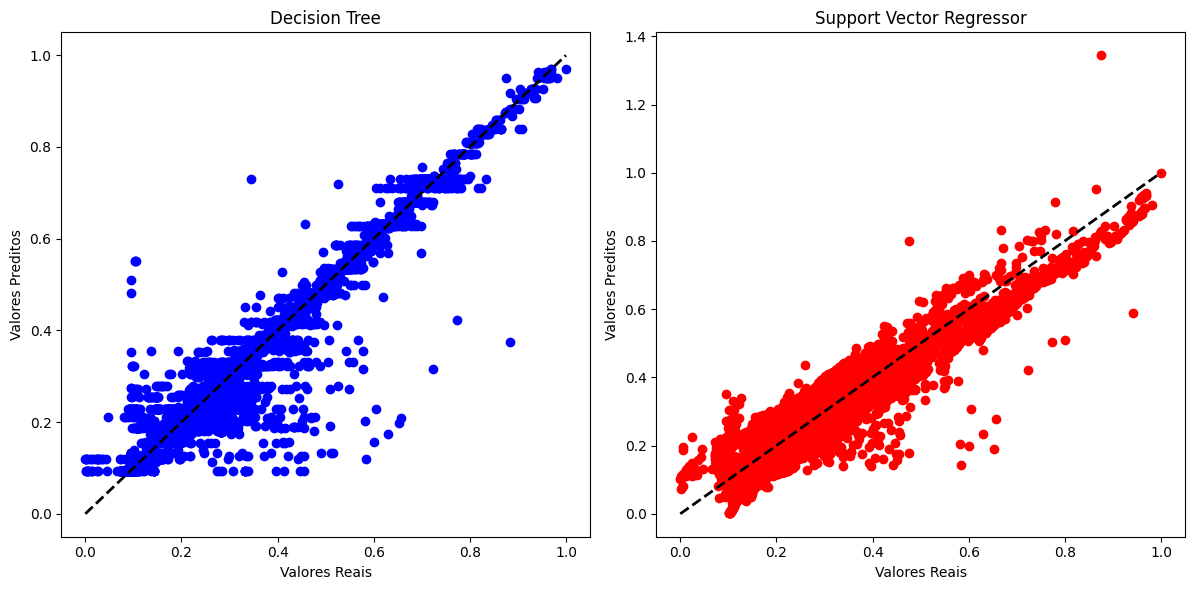

In [ ]:
import matplotlib.pyplot as plt

# Plotar as previsões e os valores reais
plt.figure(figsize=(18, 6))

# Previsões do Decision Tree
plt.subplot(1, 3, 1)
plt.scatter(y_test2, y_pred_2, color='blue')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=2)
plt.title('Decision Tree')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

# Previsões do Support Vector Regressor
plt.subplot(1, 3, 2)
plt.scatter(y_test2, y_pred_svr2, color='red')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'k--', lw=2)
plt.title('Support Vector Regressor')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')



plt.tight_layout()
plt.show()
